# Project: Heart Diseases Prediction Model

Project Objective - The goal of this project is to build a model that can predict the probability of heart disease occurrence

# Import the Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score



<h1>1. Import the Dataset</h1>

In [2]:
df = pd.read_csv('D:/harsh/heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<h1>2. Dataset Description</h1>

In [3]:
# Attributes
# Age = Age of patient
# Sex = Gender of patient
# Chest Pain = Chest Pain Type
# Resting BP = Blood Pressure in Hg
# Cholestrol = Serun Cholestrol Level in Blood
# Fasting BS = Fasting Blood Sugar
# Resting ECG = Resting Electrocardiogram Results
# Max HR = Maximum Heart Rate Achieved
# Excercise Angina = Excercise Induced Angina
# ST_slope = The slope of the peak excercise
# Heart Disease = Output class

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.shape

(918, 12)

In [6]:
df.size

11016

In [7]:
def dataset_description(df):
    all_columns = set(df.columns)
    numerical_columns = set(df.describe().columns)
    categorical_columns = all_columns - numerical_columns
    
    print('No. of Columns in DataFrame:', len(all_columns))
    print('\nColumn attribute Names:', list(all_columns))
    print('\nNo. of Numerical Columns in DataFrame:', len(numerical_columns))
    print('\nNumerical Column Names:', list(numerical_columns))
    print('\nNo. of Categorical Columns in DataFrame:', len(categorical_columns))
    print('\nCategorical Column Names:', list(categorical_columns))
dataset_description(df)    


No. of Columns in DataFrame: 12

Column attribute Names: ['HeartDisease', 'MaxHR', 'ST_Slope', 'ExerciseAngina', 'FastingBS', 'Age', 'Sex', 'Oldpeak', 'RestingBP', 'Cholesterol', 'RestingECG', 'ChestPainType']

No. of Numerical Columns in DataFrame: 7

Numerical Column Names: ['HeartDisease', 'MaxHR', 'FastingBS', 'Age', 'Oldpeak', 'RestingBP', 'Cholesterol']

No. of Categorical Columns in DataFrame: 5

Categorical Column Names: ['ST_Slope', 'ExerciseAngina', 'Sex', 'RestingECG', 'ChestPainType']


In [8]:
df.isnull().sum() 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df.nunique() 

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [11]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [12]:
df.skew(numeric_only=True).to_frame()

,0
Age,-0.195933
RestingBP,0.179839
Cholesterol,-0.610086
FastingBS,1.264484
MaxHR,-0.144359
Oldpeak,1.022872
HeartDisease,-0.215086


<h1>3. Data Visualization</h1>

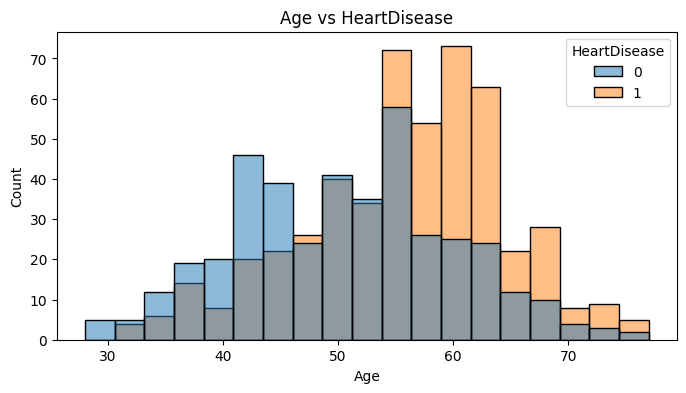

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Age', hue="HeartDisease", edgecolor="black",palette="tab10")
plt.title('Age vs HeartDisease')
plt.show()

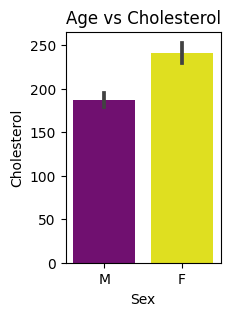

In [14]:
plt.figure(figsize=(2,3))
colors = ["purple", "yellow"]
sns.barplot(x=df.Sex,y=df.Cholesterol,palette=colors)
plt.title('Age vs Cholesterol')
plt.show()
# Average Cholesterol of Female is more than the average Cholesterol of Male

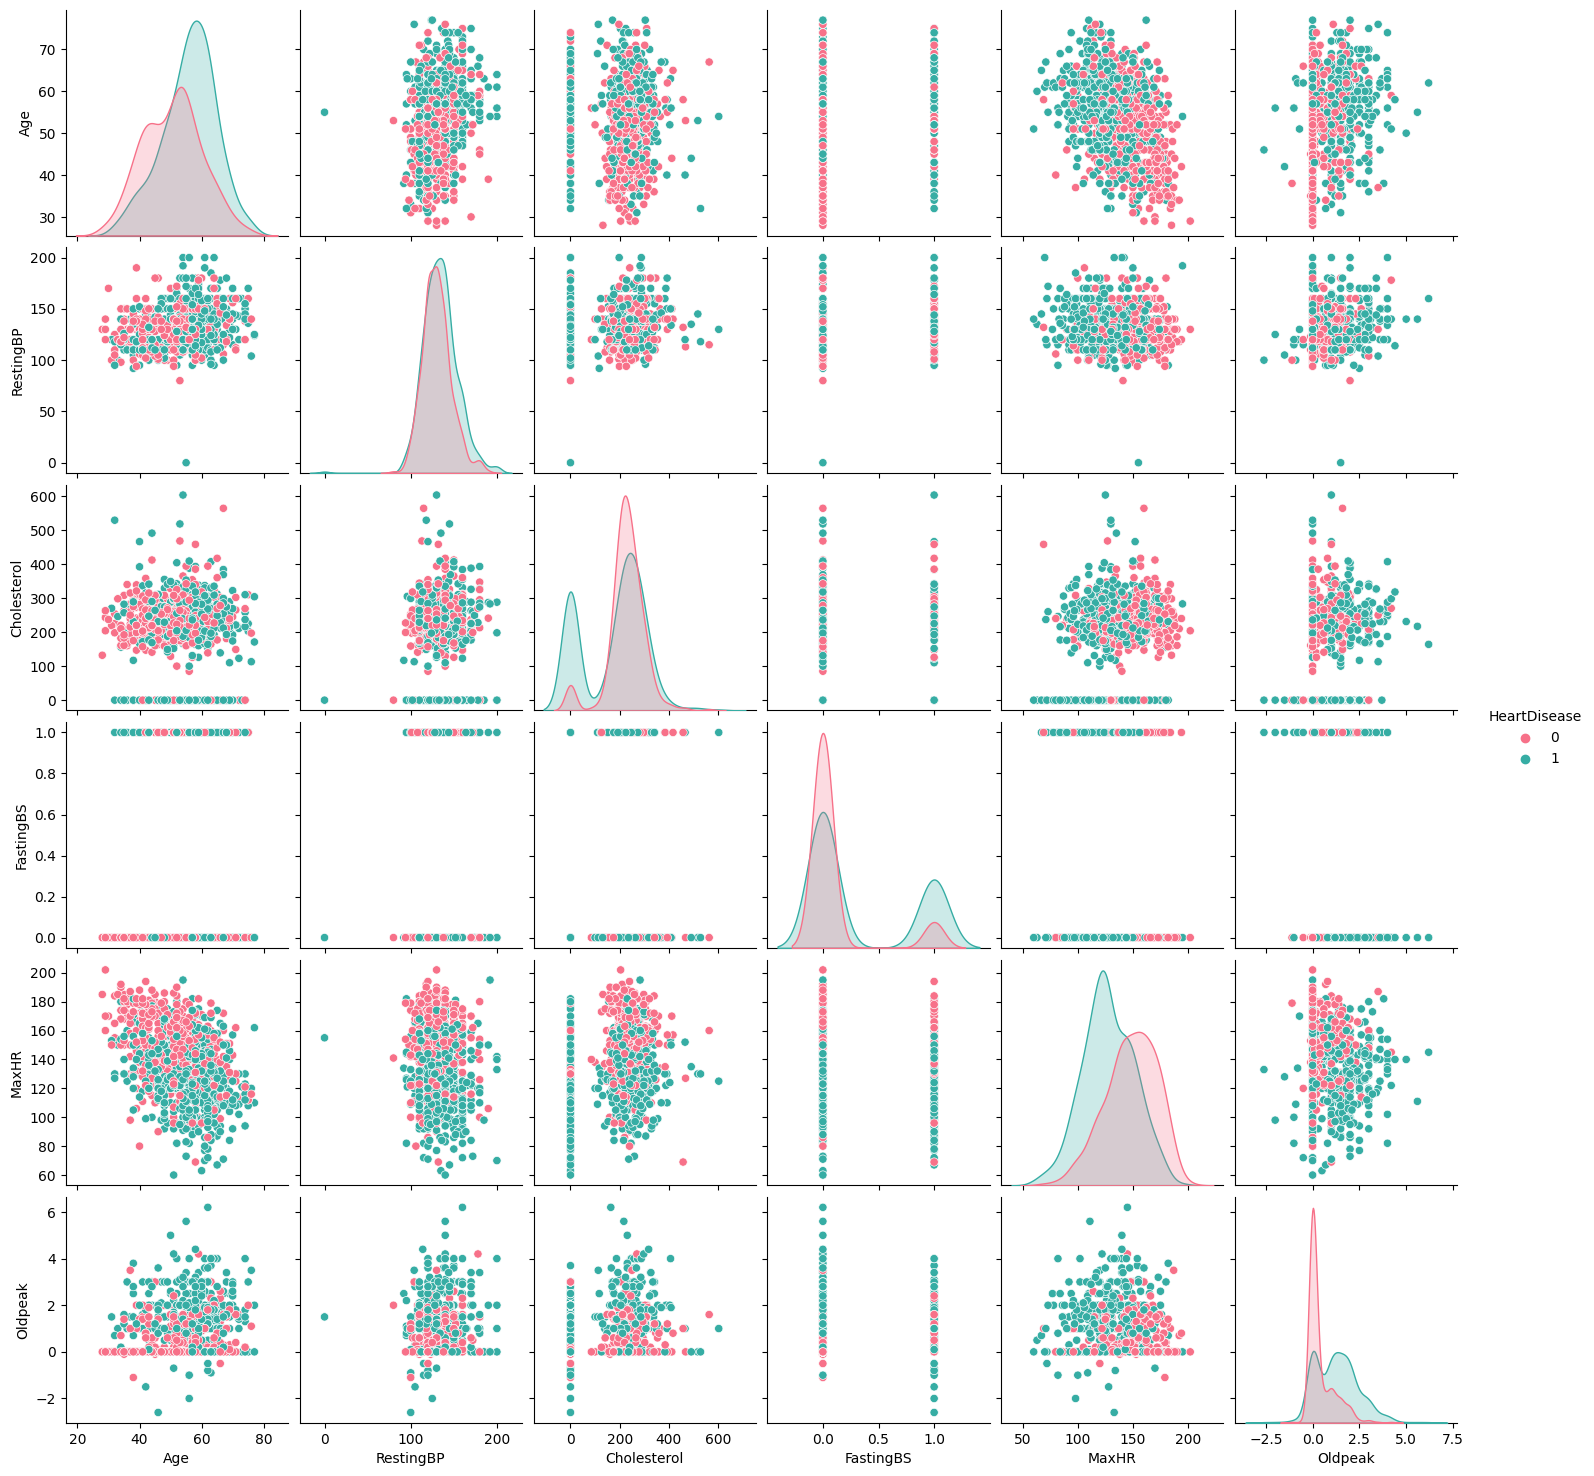

In [15]:
sns.pairplot(df,hue='HeartDisease',palette="husl")
plt.show()

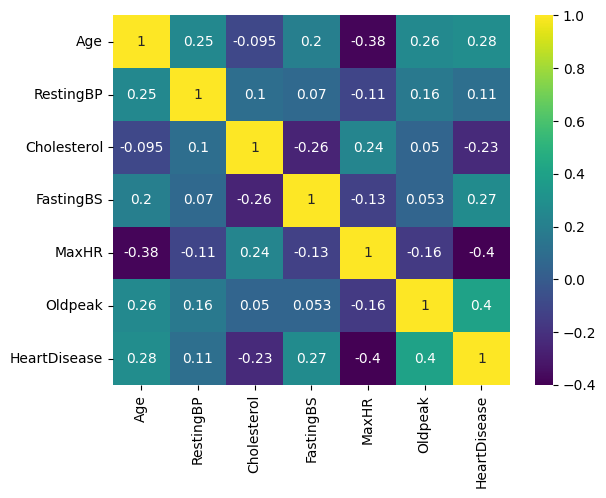

In [16]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="viridis")
plt.show()


In [17]:
df1= df.groupby('Sex').agg({'Age' : 'mean','RestingBP':'mean','Cholesterol':'mean',
                            'MaxHR':'mean',
                            'HeartDisease':'sum'})
df1


,Age,RestingBP,Cholesterol,MaxHR,HeartDisease
Sex,,,,,
F,52.492228,132.212435,241.196891,146.139896,50
M,53.782069,132.445517,187.513103,134.325517,458


In [18]:
df.pivot_table(index=['Sex','HeartDisease'],values=['Age'],aggfunc=np.mean)
# Average age of female having heart disease is higher than male

Age
Sex HeartDisease           
F   0             51.202797
    1             56.180000
M   0             50.202247
    1             55.868996

<h1>4. Data Preprocessing</h1>

In [19]:
def Outliers(df_column):
    Q75, Q25 = np.percentile(df_column, [75 ,25]) 
    IQR = Q75 - Q25
    print('Q25: ',Q25)
    print('Q75: ',Q75)
    print('Inter Quartile Range: ',IQR)
    print('Outliers lie before', Q25-1.5*IQR, 'and beyond', Q75+1.5*IQR)
    print('Number of Rows with Left Outliers:', len(df[df_column <Q25-1.5*IQR]))
    print('Number of Rows with RightOutliers:', len(df[df_column>Q75+1.5*IQR]))

In [20]:
Outliers(df['Age'])

Q25:  47.0
Q75:  60.0
Inter Quartile Range:  13.0
Outliers lie before 27.5 and beyond 79.5
Number of Rows with Left Outliers: 0
Number of Rows with RightOutliers: 0


In [21]:
Outliers(df['RestingBP'])

Q25:  120.0
Q75:  140.0
Inter Quartile Range:  20.0
Outliers lie before 90.0 and beyond 170.0
Number of Rows with Left Outliers: 2
Number of Rows with RightOutliers: 26


In [22]:
Outliers(df['Cholesterol'])

Q25:  173.25
Q75:  267.0
Inter Quartile Range:  93.75
Outliers lie before 32.625 and beyond 407.625
Number of Rows with Left Outliers: 172
Number of Rows with RightOutliers: 11


In [23]:
Outliers(df['FastingBS'])

Q25:  0.0
Q75:  0.0
Inter Quartile Range:  0.0
Outliers lie before 0.0 and beyond 0.0
Number of Rows with Left Outliers: 0
Number of Rows with RightOutliers: 214


In [24]:
Outliers(df['MaxHR'])

Q25:  120.0
Q75:  156.0
Inter Quartile Range:  36.0
Outliers lie before 66.0 and beyond 210.0
Number of Rows with Left Outliers: 2
Number of Rows with RightOutliers: 0


In [25]:
Outliers(df['Oldpeak'])

Q25:  0.0
Q75:  1.5
Inter Quartile Range:  1.5
Outliers lie before -2.25 and beyond 3.75
Number of Rows with Left Outliers: 1
Number of Rows with RightOutliers: 15


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [27]:
# Checking the distribution of the target variable
df.HeartDisease.value_counts().to_frame()

,count
HeartDisease,
1,508
0,410


In [28]:
# No. of Numerical Columns in DataFrame: 7

# Numerical Column Names: ['Oldpeak', 'Age', 'Cholesterol', 'FastingBS', 'MaxHR', 'HeartDisease', 'RestingBP']

# No. of Categorical Columns in DataFrame: 5

# Categorical Column Names: ['ST_Slope', 'RestingECG', 'ExerciseAngina', 'Sex', 'ChestPainType']

In [29]:
# Binary encoding
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})

In [30]:
one_hot_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
df = pd.get_dummies(df, columns=one_hot_cols,dtype=int)
df.head(10)


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
5,39,1,120,339,0,170,0,0.0,0,0,0,1,0,0,1,0,0,0,1
6,45,0,130,237,0,170,0,0.0,0,0,1,0,0,0,1,0,0,0,1
7,54,1,110,208,0,142,0,0.0,0,0,1,0,0,0,1,0,0,0,1
8,37,1,140,207,0,130,1,1.5,1,1,0,0,0,0,1,0,0,1,0
9,48,0,120,284,0,120,0,0.0,0,0,1,0,0,0,1,0,0,0,1


In [31]:
scaler = StandardScaler()
continuous_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS']
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

In [32]:
X = df.drop('HeartDisease', axis=1) # features (excluding target variable)
y = df['HeartDisease'] # target variable


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Train a logistic regression model
clf = LogisticRegression() 
clf.fit(X_train, y_train)


LogisticRegression()

In [35]:
y_pred = clf.predict(X_test)


In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.41%


In [37]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       112
           1       0.92      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.88      0.88       276



In [38]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[100  12]
 [ 20 144]]


In [39]:
# 3. Train a Random Forest Model
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42) 
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [40]:
y_pred = rf_clf.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 89.13%


In [42]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       112
           1       0.92      0.90      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



In [43]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 99  13]
 [ 17 147]]


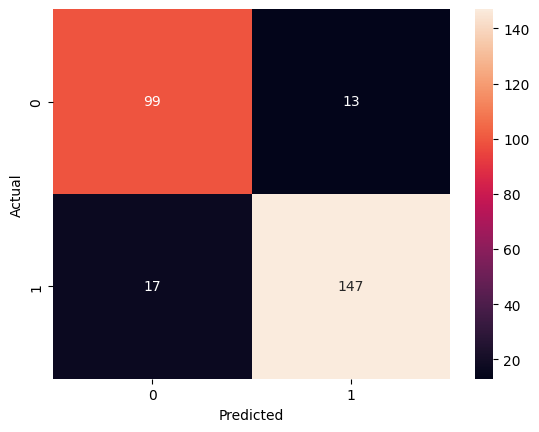

In [46]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()